In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/cos40007/project/LTE_KPI.csv'

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv(file_path)

# Data cleaning

In [6]:
# Identify columns containing "#DIV/0"
div0_columns = [col for col in data.columns if data[col].astype(str).str.contains("#DIV/0").any()]

# Remove the identified columns
data = data.drop(columns=div0_columns)

data.head()

,Date,Duplexing Type,Site Id,Sector,Sector id,Carrier Number DL (earfcn),DL Traffic (GB),UL Traffic (GB),Total Traffic (GB),Average User Throughput in DownLink (Mbps),...,DL User Throughput(Mbps)_DENOM,DL User Throughput(Mbps)_NUM,Average User Throughput in UpLink (Mbps)_NUM,Average User Throughput in UpLink (Mbps)_DENOM,CSSR RRC_DENOM,CSSR RRC_NUM,CSSR eRAB_NUM,CSSR eRAB DENOM,ERAB Drop Rate_DENOM,ERAB Drop Rate_NUM
0,5/1/2024,FDD,Site1,Site1_A,A,426.0,143.094514,20.220520,163.315034,14.054986,...,61972808.0,871026964.0,47279933.0,42200733.0,59697.0,59683.0,65880.0,65910.0,93375.0,80.0
1,5/1/2024,FDD,Site1,Site1_B,B,426.0,115.384129,15.803991,131.188121,11.911394,...,61494094.0,732480358.0,39149458.0,57072276.0,57988.0,57954.0,56705.0,56738.0,72948.0,65.0
2,5/1/2024,FDD,Site1,Site1_C,C,426.0,126.375360,19.135785,145.511145,7.947476,...,104710484.0,832184097.0,38467120.0,38495039.0,47042.0,46964.0,52327.0,52382.0,63327.0,90.0
3,5/1/2024,FDD,Site1,Site1_A,A,1399.0,92.720334,11.621201,104.341535,16.459679,...,32499337.0,534928640.0,31661166.0,54250065.0,251204.0,251122.0,262628.0,262743.0,229600.0,191.0
4,5/1/2024,FDD,Site1,Site1_B,B,1399.0,82.969060,9.867506,92.836566,15.625796,...,32810105.0,512684013.0,24002712.0,42403646.0,204102.0,204051.0,193532.0,193636.0,184256.0,162.0


In [7]:
# Remove columns with all missing values
data = data.dropna(axis=1, how='all')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

data.head()

<ipython-input-7-8e75080ae7d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Duplexing Type,Site Id,Sector,Sector id,Carrier Number DL (earfcn),DL Traffic (GB),UL Traffic (GB),Total Traffic (GB),Average User Throughput in DownLink (Mbps),...,DL User Throughput(Mbps)_DENOM,DL User Throughput(Mbps)_NUM,Average User Throughput in UpLink (Mbps)_NUM,Average User Throughput in UpLink (Mbps)_DENOM,CSSR RRC_DENOM,CSSR RRC_NUM,CSSR eRAB_NUM,CSSR eRAB DENOM,ERAB Drop Rate_DENOM,ERAB Drop Rate_NUM
0,2024-05-01,FDD,Site1,Site1_A,A,426.0,143.094514,20.220520,163.315034,14.054986,...,61972808.0,871026964.0,47279933.0,42200733.0,59697.0,59683.0,65880.0,65910.0,93375.0,80.0
1,2024-05-01,FDD,Site1,Site1_B,B,426.0,115.384129,15.803991,131.188121,11.911394,...,61494094.0,732480358.0,39149458.0,57072276.0,57988.0,57954.0,56705.0,56738.0,72948.0,65.0
2,2024-05-01,FDD,Site1,Site1_C,C,426.0,126.375360,19.135785,145.511145,7.947476,...,104710484.0,832184097.0,38467120.0,38495039.0,47042.0,46964.0,52327.0,52382.0,63327.0,90.0
3,2024-05-01,FDD,Site1,Site1_A,A,1399.0,92.720334,11.621201,104.341535,16.459679,...,32499337.0,534928640.0,31661166.0,54250065.0,251204.0,251122.0,262628.0,262743.0,229600.0,191.0
4,2024-05-01,FDD,Site1,Site1_B,B,1399.0,82.969060,9.867506,92.836566,15.625796,...,32810105.0,512684013.0,24002712.0,42403646.0,204102.0,204051.0,193532.0,193636.0,184256.0,162.0


In [8]:
# Remove rows where any element is missing
data = data.dropna()

# Check if there are still any missing values and display basic info of the cleaned data
print(f"Data cleaned successfully. Here's the info of the cleaned dataset: {data.info()}")
print(f"Check for any remaining missing values: {data.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 6923 entries, 0 to 6922
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Date                                            6923 non-null   datetime64[ns]
 1   Duplexing Type                                  6923 non-null   object        
 2   Site Id                                         6923 non-null   object        
 3   Sector                                          6923 non-null   object        
 4   Sector id                                       6923 non-null   object        
 5   Carrier Number DL (earfcn)                      6923 non-null   float64       
 6   DL Traffic (GB)                                 6923 non-null   float64       
 7   UL Traffic (GB)                                 6923 non-null   float64       
 8   Total Traffic (GB)                              6923 

In [9]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale, assuming scaling all numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Fit and transform the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the normalized data
data.head()

<ipython-input-9-5c2a5a08f8be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


,Date,Duplexing Type,Site Id,Sector,Sector id,Carrier Number DL (earfcn),DL Traffic (GB),UL Traffic (GB),Total Traffic (GB),Average User Throughput in DownLink (Mbps),...,DL User Throughput(Mbps)_DENOM,DL User Throughput(Mbps)_NUM,Average User Throughput in UpLink (Mbps)_NUM,Average User Throughput in UpLink (Mbps)_DENOM,CSSR RRC_DENOM,CSSR RRC_NUM,CSSR eRAB_NUM,CSSR eRAB DENOM,ERAB Drop Rate_DENOM,ERAB Drop Rate_NUM
0,2024-05-01,FDD,Site1,Site1_A,A,0.0,0.553425,0.553899,0.556853,0.054360,...,0.063552,0.488966,0.228521,0.067020,0.153243,0.153323,0.177580,0.177444,0.253146,0.065789
1,2024-05-01,FDD,Site1,Site1_B,B,0.0,0.446254,0.432917,0.447310,0.046069,...,0.063061,0.411190,0.189224,0.090638,0.148856,0.148881,0.152849,0.152751,0.197767,0.053454
2,2024-05-01,FDD,Site1,Site1_C,C,0.0,0.488763,0.524185,0.496147,0.030738,...,0.107378,0.467161,0.185926,0.061135,0.120758,0.120649,0.141048,0.141023,0.171684,0.074013
3,2024-05-01,FDD,Site1,Site1_A,A,1.0,0.358600,0.318338,0.355772,0.063660,...,0.033327,0.300291,0.153030,0.086156,0.644845,0.645122,0.707917,0.707359,0.622462,0.157072
4,2024-05-01,FDD,Site1,Site1_B,B,1.0,0.320887,0.270300,0.316544,0.060435,...,0.033646,0.287804,0.116014,0.067342,0.523934,0.524198,0.521668,0.521309,0.499531,0.133224


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Step 1: Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Display updated data
data.head()

,Date,Duplexing Type,Site Id,Sector,Sector id,Carrier Number DL (earfcn),DL Traffic (GB),UL Traffic (GB),Total Traffic (GB),Average User Throughput in DownLink (Mbps),...,DL User Throughput(Mbps)_DENOM,DL User Throughput(Mbps)_NUM,Average User Throughput in UpLink (Mbps)_NUM,Average User Throughput in UpLink (Mbps)_DENOM,CSSR RRC_DENOM,CSSR RRC_NUM,CSSR eRAB_NUM,CSSR eRAB DENOM,ERAB Drop Rate_DENOM,ERAB Drop Rate_NUM
0,2024-05-01,FDD,Site1,Site1_A,A,0.0,0.553425,0.553899,0.556853,0.054360,...,0.063552,0.488966,0.228521,0.067020,0.153243,0.153323,0.177580,0.177444,0.253146,0.065789
1,2024-05-01,FDD,Site1,Site1_B,B,0.0,0.446254,0.432917,0.447310,0.046069,...,0.063061,0.411190,0.189224,0.090638,0.148856,0.148881,0.152849,0.152751,0.197767,0.053454
2,2024-05-01,FDD,Site1,Site1_C,C,0.0,0.488763,0.524185,0.496147,0.030738,...,0.107378,0.467161,0.185926,0.061135,0.120758,0.120649,0.141048,0.141023,0.171684,0.074013
3,2024-05-01,FDD,Site1,Site1_A,A,1.0,0.358600,0.318338,0.355772,0.063660,...,0.033327,0.300291,0.153030,0.086156,0.644845,0.645122,0.707917,0.707359,0.622462,0.157072
4,2024-05-01,FDD,Site1,Site1_B,B,1.0,0.320887,0.270300,0.316544,0.060435,...,0.033646,0.287804,0.116014,0.067342,0.523934,0.524198,0.521668,0.521309,0.499531,0.133224


In [11]:
# Step 2: Encode categorical variables using LabelEncoder
categorical_columns = ['Duplexing Type', 'Site Id', 'Sector', 'Sector id']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store label encoder for each column to use later for inverse transform

In [12]:
# Step 3: Check for missing values (already claimed no missing values, but double-checking)
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.mean())  # Filling missing values with mean if any

In [13]:
# Step 4: Check normalization and standardize if necessary
# Since data is already normalized, we'll verify this by checking if all values are between 0 and 1
if (data.select_dtypes(include=['float64', 'int64']).min().min() < 0) or (data.select_dtypes(include=['float64', 'int64']).max().max() > 1):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [14]:


# Step 5: Dimensionality reduction (optional, uncomment below lines to apply PCA)
# pca = PCA(n_components=10)  # Adjust components based on variance or desired feature reduction
# principal_components = pca.fit_transform(data.select_dtypes(include=['float64', 'int64']))
# data = pd.DataFrame(data=principal_components)

In [15]:
print(data.describe())

                                Date  Duplexing Type      Site Id  \
count                           6923          6923.0  6923.000000   
mean   2024-06-27 08:41:40.187779840             0.0     0.501420   
min              2024-05-01 00:00:00             0.0     0.000000   
25%              2024-05-30 00:00:00             0.0     0.222222   
50%              2024-06-27 00:00:00             0.0     0.444444   
75%              2024-07-26 00:00:00             0.0     0.777778   
max              2024-08-24 00:00:00             0.0     1.000000   
std                              NaN             0.0     0.317554   

            Sector    Sector id  Carrier Number DL (earfcn)  DL Traffic (GB)  \
count  6923.000000  6923.000000                 6923.000000      6923.000000   
mean      0.503061     0.500072                    0.500072         0.323910   
min       0.000000     0.000000                    0.000000         0.000000   
25%       0.241379     0.000000                    0.00000

In [16]:
data.columns

Index(['Date', 'Duplexing Type', 'Site Id', 'Sector', 'Sector id',
       'Carrier Number DL (earfcn)', 'DL Traffic (GB)', 'UL Traffic (GB)',
       'Total Traffic (GB)', 'Average User Throughput in DownLink (Mbps)',
       'Average DL PDCP Throughput (Mbit/s)',
       'Average UL PDCP Throughput (Mbit/s)',
       'Intra Frequency Handover Success Rate (%)',
       'Inter Frequency Handover Success Rate (%)', 'Cell Availability',
       'Scell Traffic Volume', 'Number of CSFB to GSM',
       'Number of CSFB to WCDMA', 'DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded',
       'Maximum Number of Users in a Cell', 'PcellVolume_DL_MAC',
       'ScellVolume_DL_MAC', 'DL Payload(GB)', 'CA capable DL UE Payload(GB)',
       'PS E-UTRAN RRC Setup successful Ratio (%)',
       'PS E-UTRAN RAB Setup Success Rate (%)',
       'DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeAuto',
       'DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeMan',
       'IRAT/Session Continuity to 2G', 'PS Drop Call Rate_NUM',
       'PS Drop Cal

In [17]:
# Dropping the specified columns because they overlap and 'Date' column not important
data = data.drop([
    'Date',
    'Duplexing Type',
    'Number of CSFB to WCDMA',
    'Sector'
], axis=1)

print(data.columns)

Index(['Site Id', 'Sector id', 'Carrier Number DL (earfcn)', 'DL Traffic (GB)',
       'UL Traffic (GB)', 'Total Traffic (GB)',
       'Average User Throughput in DownLink (Mbps)',
       'Average DL PDCP Throughput (Mbit/s)',
       'Average UL PDCP Throughput (Mbit/s)',
       'Intra Frequency Handover Success Rate (%)',
       'Inter Frequency Handover Success Rate (%)', 'Cell Availability',
       'Scell Traffic Volume', 'Number of CSFB to GSM',
       'DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded',
       'Maximum Number of Users in a Cell', 'PcellVolume_DL_MAC',
       'ScellVolume_DL_MAC', 'DL Payload(GB)', 'CA capable DL UE Payload(GB)',
       'PS E-UTRAN RRC Setup successful Ratio (%)',
       'PS E-UTRAN RAB Setup Success Rate (%)',
       'DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeAuto',
       'DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeMan',
       'IRAT/Session Continuity to 2G', 'PS Drop Call Rate_NUM',
       'PS Drop Call Rate_DENOM', 'DL User Throughput(Mbps)_DENOM',
       'DL Use

In [18]:
original_data = data.copy()

# Feature Engineering

## Composite features study

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

def simplified_correlation_analysis(data, threshold=0.7):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find the top N strongest correlations
    strong_correlations = upper.unstack().dropna().sort_values(key=abs, ascending=False)
    strong_correlations = strong_correlations[abs(strong_correlations) > threshold]

    return strong_correlations

def group_correlated_features(top_correlations):
    groups = defaultdict(set)
    for (var1, var2), corr in top_correlations.items():
        group = None
        for key, group_set in groups.items():
            if var1 in group_set or var2 in group_set:
                group = key
                break
        if group is None:
            group = len(groups)
        groups[group].add(var1)
        groups[group].add(var2)
    return groups

# Run the analysis
top_correlations = simplified_correlation_analysis(data)

# Group correlated features
grouped_features = group_correlated_features(top_correlations)

# Print the grouped correlations
print(f"Top correlations grouped (absolute value > {0.7}):")
for group, features in grouped_features.items():
    print(f"\nGroup {group + 1}:")
    print(", ".join(sorted(features)))
    for (var1, var2), corr in top_correlations.items():
        if var1 in features and var2 in features:
            print(f"  {var1} -- {var2}: {corr:.2f}")

Top correlations grouped (absolute value > 0.7):

Group 1:
Scell Traffic Volume, ScellVolume_DL_MAC
  ScellVolume_DL_MAC -- Scell Traffic Volume: 1.00

Group 2:
Average DL PDCP Throughput (Mbit/s), Average UL PDCP Throughput (Mbit/s), Average User Throughput in UpLink (Mbps)_DENOM, Average User Throughput in UpLink (Mbps)_NUM, CA capable DL UE Payload(GB), CSSR RRC_DENOM, CSSR RRC_NUM, CSSR eRAB DENOM, CSSR eRAB_NUM, DL Payload(GB), DL Traffic (GB), DL User Throughput(Mbps)_DENOM, DL User Throughput(Mbps)_NUM, ERAB Drop Rate_DENOM, ERAB Drop Rate_NUM, PS Drop Call Rate_DENOM, PS Drop Call Rate_NUM, PcellVolume_DL_MAC, Total Traffic (GB), UL Traffic (GB)
  DL Payload(GB) -- DL Traffic (GB): 1.00
  CSSR eRAB DENOM -- CSSR eRAB_NUM: 1.00
  CSSR RRC_NUM -- CSSR RRC_DENOM: 1.00
  ERAB Drop Rate_DENOM -- PS Drop Call Rate_DENOM: 1.00
  ERAB Drop Rate_NUM -- PS Drop Call Rate_NUM: 1.00
  Total Traffic (GB) -- DL Traffic (GB): 1.00
  DL Payload(GB) -- Total Traffic (GB): 1.00
  PcellVolume_DL_

In [20]:
# Print statistics for each feature in the groups
print("\nStatistics for each feature in the groups:")
for group, features in grouped_features.items():
    print(f"\nGroup {group + 1}:")
    stats = data[list(features)].describe()

    # Transpose for better readability and round to 2 decimal places
    stats_formatted = stats.transpose().round(2)

    # Add a column for the range (max - min)
    stats_formatted['range'] = stats_formatted['max'] - stats_formatted['min']

    # Reorder columns for better overview
    cols_order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']
    stats_formatted = stats_formatted[cols_order]

    print(stats_formatted)

    # # Add a simple visualization for each group
    # plt.figure(figsize=(10, 4))
    # sns.boxplot(data=data[list(features)])
    # plt.title(f"Distribution of Features in Group {group + 1}")
    # plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    # plt.show()


Statistics for each feature in the groups:

Group 1:
                       count  mean   std  min  25%   50%   75%  max  range
ScellVolume_DL_MAC    6923.0  0.11  0.14  0.0  0.0  0.06  0.16  1.0    1.0
Scell Traffic Volume  6923.0  0.11  0.14  0.0  0.0  0.06  0.16  1.0    1.0

Group 2:
                                                 count  mean   std  min   25%  \
DL Payload(GB)                                  6923.0  0.32  0.21  0.0  0.17   
Average User Throughput in UpLink (Mbps)_NUM    6923.0  0.16  0.11  0.0  0.09   
ERAB Drop Rate_DENOM                            6923.0  0.25  0.17  0.0  0.12   
CSSR eRAB_NUM                                   6923.0  0.25  0.17  0.0  0.11   
DL User Throughput(Mbps)_DENOM                  6923.0  0.10  0.11  0.0  0.03   
Total Traffic (GB)                              6923.0  0.32  0.21  0.0  0.17   
CSSR RRC_DENOM                                  6923.0  0.26  0.18  0.0  0.12   
CSSR RRC_NUM                                    6923.0  0.26  0

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

def normalize_feature(series):
    return (series - series.min()) / (series.max() - series.min())

# Prepare data for comparison
comparison_data = []
for group, features in grouped_features.items():
    group_stats = data[list(features)].describe()
    for feature in features:
        comparison_data.append({
            'Group': f'Group {group + 1}',
            'Feature': feature,
            'Mean': group_stats.loc['mean', feature],
            'Std': group_stats.loc['std', feature],
            'Median': group_stats.loc['50%', feature],
            'Normalized': normalize_feature(data[feature])
        })

comparison_df = pd.DataFrame(comparison_data)

# Print summary of comparisons
print("Comparison of statistics between groups:")
print(comparison_df.groupby('Group')[['Mean', 'Std', 'Median']].mean().round(2))

Comparison of statistics between groups:
         Mean   Std  Median
Group                      
Group 1  0.11  0.14    0.06
Group 2  0.25  0.17    0.23
Group 3  0.25  0.17    0.20
Group 4  0.26  0.18    0.22
Group 5  0.25  0.17    0.21
Group 6  0.17  0.13    0.15
Group 7  0.99  0.02    0.99
Group 8  0.50  0.04    0.50


## Creating composite features

In [22]:
import pandas as pd
import numpy as np
##NOTICE##
# Assuming 'data' is your original DataFrame

# Group 1: Secondary Cell Performance
group1_columns = ['ScellVolume_DL_MAC', 'Scell Traffic Volume']
data['Secondary_Cell_Performance'] = data[group1_columns].mean(axis=1)
data = data.drop(columns=[col for col in group1_columns if col in data.columns])

# Group 2: Traffic Volume and Payload Metrics
traffic_columns = [
    'PS Drop Call Rate_DENOM', 'CSSR eRAB DENOM', 'Average DL PDCP Throughput (Mbit/s)',
    'Average UL PDCP Throughput (Mbit/s)', 'DL User Throughput(Mbps)_DENOM',
    'PcellVolume_DL_MAC', 'CSSR RRC_DENOM', 'UL Traffic (GB)', 'ERAB Drop Rate_DENOM',
    'CSSR eRAB_NUM', 'ERAB Drop Rate_NUM', 'Average User Throughput in UpLink (Mbps)_NUM',
    'Average User Throughput in UpLink (Mbps)_DENOM', 'DL Payload(GB)', 'DL Traffic (GB)',
    'PS Drop Call Rate_NUM', 'Total Traffic (GB)', 'DL User Throughput(Mbps)_NUM',
    'CA capable DL UE Payload(GB)', 'CSSR RRC_NUM', 'Average User Throughput in DownLink (Mbps)'
]
data['Traffic_Volume_and_Payload_Metrics'] = data[[col for col in traffic_columns if col in data.columns]].mean(axis=1)
data = data.drop(columns=[col for col in traffic_columns if col in data.columns])

# Drop remaining columns from groups 3, 4, 5, 6
drop_columns = [
    'Number of CSFB to GSM'
]
data = data.drop(columns=[col for col in drop_columns if col in data.columns])

# Group 7: Setup Success Rate
setup_columns = [
    'PS E-UTRAN RRC Setup successful Ratio (%)',
    'Intra Frequency Handover Success Rate (%)',
    'PS E-UTRAN RAB Setup Success Rate (%)'
]
data['Setup_Success_Rate'] = data[[col for col in setup_columns if col in data.columns]].mean(axis=1)
data = data.drop(columns=[col for col in setup_columns if col in data.columns])

# Group 8: Cell Availability and Downtime
availability_columns = [
    'DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeAuto',
    'Cell Availability'
]
data['Cell_Availability_and_Downtime'] = data[[col for col in availability_columns if col in data.columns]].mean(axis=1)
data = data.drop(columns=[col for col in availability_columns if col in data.columns])

# Print the new list of columns
print("\nNew list of columns:")
print(data.columns.tolist())

original_data = data.copy()


New list of columns:
['Site Id', 'Sector id', 'Carrier Number DL (earfcn)', 'Inter Frequency Handover Success Rate (%)', 'DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded', 'Maximum Number of Users in a Cell', 'DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeMan', 'IRAT/Session Continuity to 2G', 'Secondary_Cell_Performance', 'Traffic_Volume_and_Payload_Metrics', 'Setup_Success_Rate', 'Cell_Availability_and_Downtime']


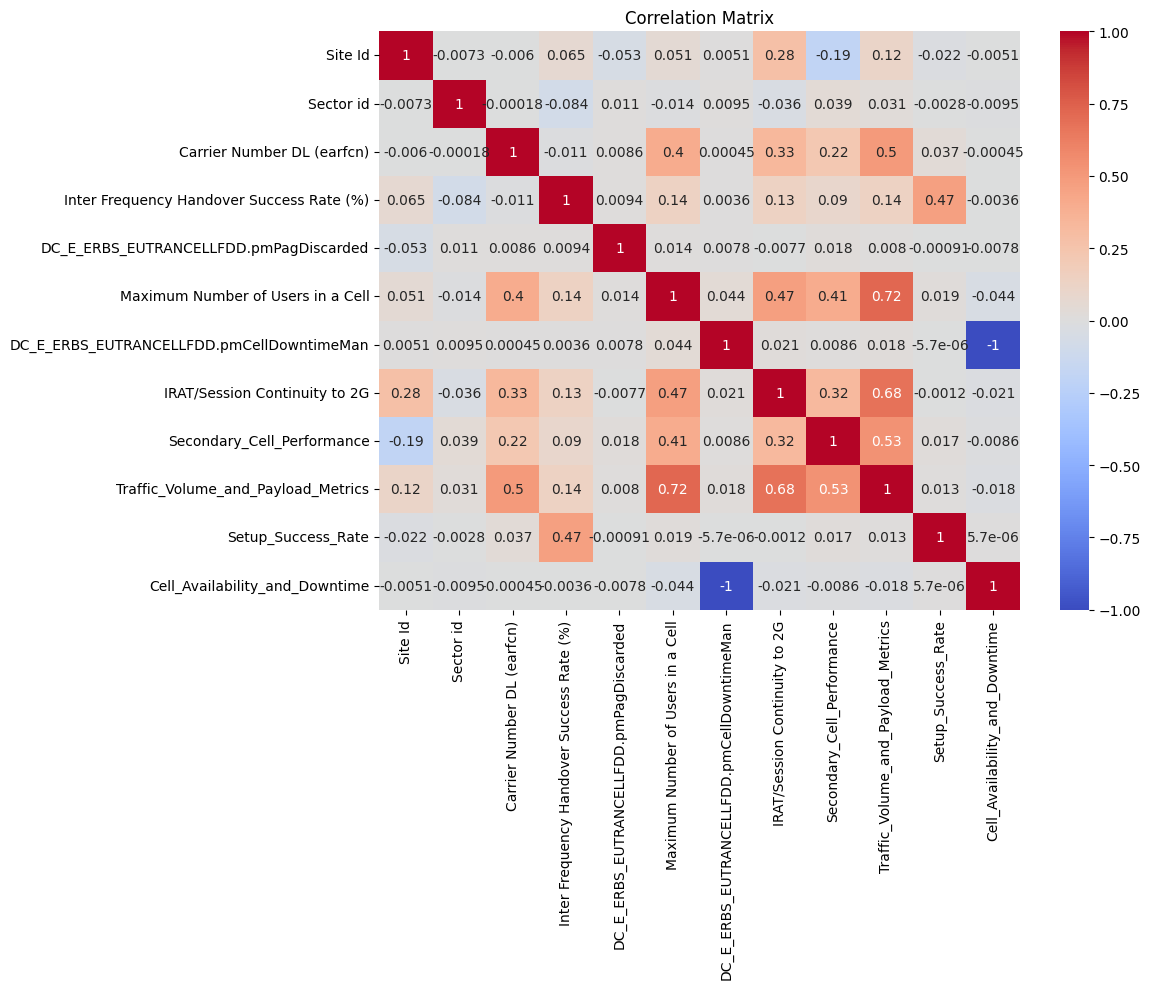

In [23]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Dropped column: DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeMan


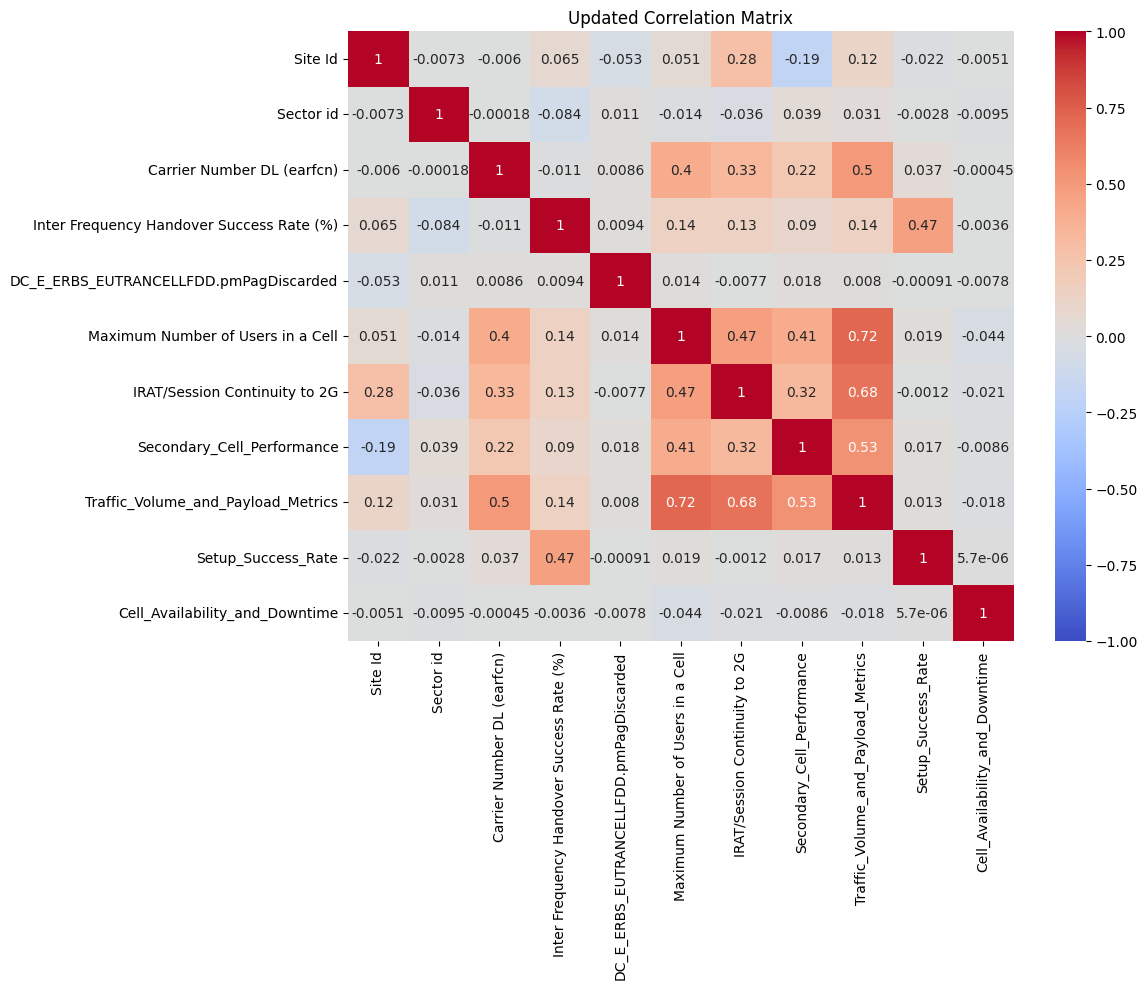

In [24]:
# There is DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeMan having -1 correlation score
# Drop the column with perfect negative correlation
columns_to_drop = ['DC_E_ERBS_EUTRANCELLFDD.pmCellDowntimeMan']

# Check if the column exists before dropping
for col in columns_to_drop:
    if col in data.columns:
        data = data.drop(columns=[col])
        print(f"Dropped column: {col}")
    else:
        print(f"Column not found: {col}")

# Optionally, you can recalculate and display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Updated Correlation Matrix')
plt.tight_layout()
plt.show()

In [25]:
data.to_csv('data.csv', index=False)

In [26]:
data.head()

,Site Id,Sector id,Carrier Number DL (earfcn),Inter Frequency Handover Success Rate (%),DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded,Maximum Number of Users in a Cell,IRAT/Session Continuity to 2G,Secondary_Cell_Performance,Traffic_Volume_and_Payload_Metrics,Setup_Success_Rate,Cell_Availability_and_Downtime
0,0.0,0.0,0.0,0.987540,0.0,0.112944,0.120061,0.201746,0.310294,0.989727,0.5
1,0.0,0.5,0.0,0.992857,0.0,0.100254,0.224164,0.200804,0.265644,0.993366,0.5
2,0.0,1.0,0.0,0.997496,0.0,0.090102,0.028116,0.134881,0.276384,0.996126,0.5
3,0.0,0.0,1.0,0.985205,0.0,0.131980,0.353343,0.218896,0.384730,0.993838,0.5
4,0.0,0.5,1.0,0.979498,0.0,0.120558,0.465805,0.332688,0.316551,0.992737,0.5


# Training models

## Performance

### Removing low-correlated features

Removed columns:
- Sector id
- DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded
- Setup_Success_Rate
- Cell_Availability_and_Downtime


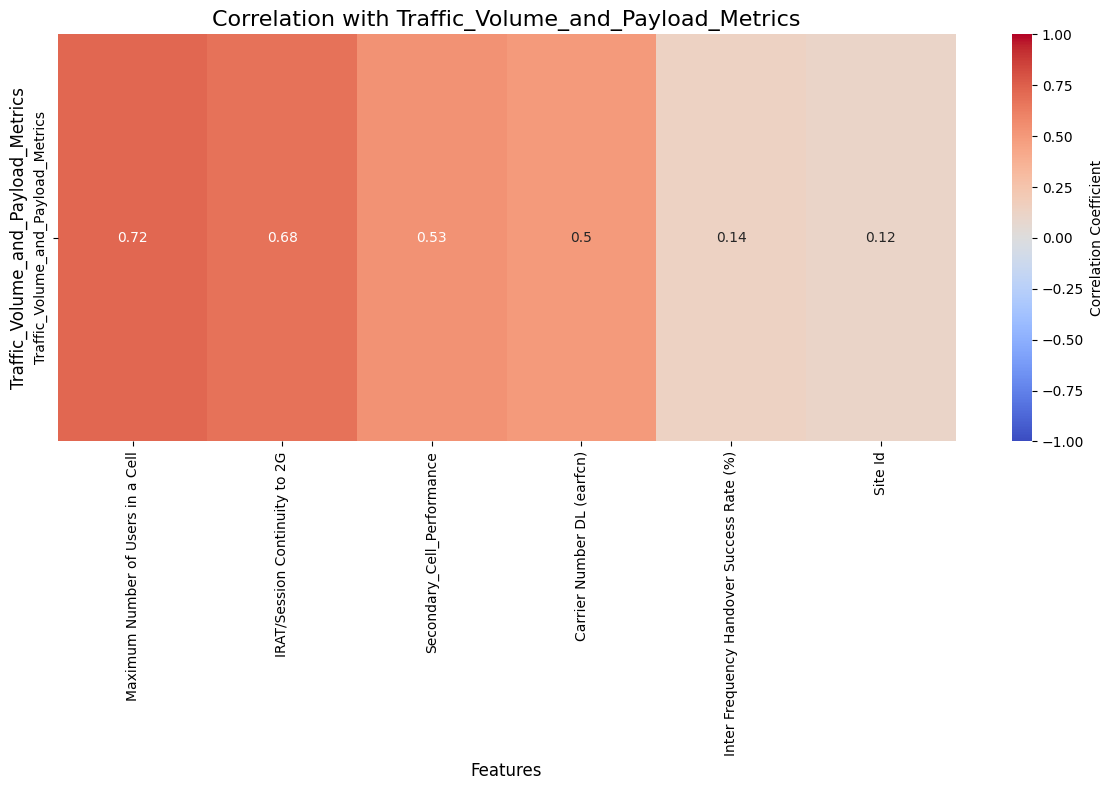

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Calculate correlations with Traffic_Volume_and_Payload_Metrics
correlations = data.corr()['Traffic_Volume_and_Payload_Metrics'].sort_values(key=abs, ascending=False)

# Remove Traffic_Volume_and_Payload_Metrics itself from the correlations
correlations = correlations.drop('Traffic_Volume_and_Payload_Metrics')

# Create data_performance DataFrame (features with abs correlation >= 0.1)
columns_to_keep = correlations[abs(correlations) >= 0.1].index.tolist() + ['Traffic_Volume_and_Payload_Metrics']
data_performance = data[columns_to_keep].copy()

# Identify removed columns
removed_columns = set(data.columns) - set(columns_to_keep)

# Print removed columns
print("Removed columns:")
for col in removed_columns:
    print(f"- {col}")

correlations_after = data_performance.corr()['Traffic_Volume_and_Payload_Metrics'].sort_values(key=abs, ascending=False)

# Remove Traffic_Volume_and_Payload_Metrics itself from the correlations
correlations_after = correlations_after.drop('Traffic_Volume_and_Payload_Metrics')

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(correlations_after).transpose()

# Create the plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation with Traffic_Volume_and_Payload_Metrics', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Traffic_Volume_and_Payload_Metrics', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optionally, save data_performance to a CSV file
# data_performance.to_csv('data_performance.csv', index=False)

In [28]:
# Drop Site Id as it is also target feature
data_performance = data_performance.drop(columns=['Site Id'])

# Print the new list of columns
print("\nNew list of columns:")
print(data_performance.columns.tolist())


New list of columns:
['Maximum Number of Users in a Cell', 'IRAT/Session Continuity to 2G', 'Secondary_Cell_Performance', 'Carrier Number DL (earfcn)', 'Inter Frequency Handover Success Rate (%)', 'Traffic_Volume_and_Payload_Metrics']


In [29]:
data_performance.head()

,Maximum Number of Users in a Cell,IRAT/Session Continuity to 2G,Secondary_Cell_Performance,Carrier Number DL (earfcn),Inter Frequency Handover Success Rate (%),Traffic_Volume_and_Payload_Metrics
0,0.112944,0.120061,0.201746,0.0,0.987540,0.310294
1,0.100254,0.224164,0.200804,0.0,0.992857,0.265644
2,0.090102,0.028116,0.134881,0.0,0.997496,0.276384
3,0.131980,0.353343,0.218896,1.0,0.985205,0.384730
4,0.120558,0.465805,0.332688,1.0,0.979498,0.316551


In [30]:
data_performance.to_csv('data_performance.csv', index=False)

### ANN

In [29]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras_tuner import RandomSearch

In [31]:
# Splitting the data into features (X) and target (y)
X = data_performance.drop(columns=['Traffic_Volume_and_Payload_Metrics'])
y = data_performance['Traffic_Volume_and_Payload_Metrics']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()

    # Adding the first hidden layer with tunable number of units
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))

    # Adding additional hidden layers with tunable number of layers and units
    for i in range(hp.Int('num_layers', 1, 4)):  # Searching between 1 to 4 hidden layers
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))

    # Output layer
    model.add(tf.keras.layers.Dense(1))  # Regression output

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [33]:
# Initialize Keras Tuner RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Minimize validation loss
    max_trials=10,  # Number of different models to try
    executions_per_trial=3,  # Averaging over 3 runs for each model
    directory='my_dir',
    project_name='ann_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 02m 51s]
val_loss: 0.0019402979717900355

Best val_loss So Far: 0.0019069452149172623
Total elapsed time: 00h 42m 46s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [34]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the best model: {mse}")

# Display a summary of the best model
best_model.summary()

# Optional: Save the best model
best_model.save('best_ann_model.h5')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error of the best model: 0.0018926859550293174


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 448)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 448)                 │         201,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 320)                 │         143,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,321 (2.02 MB)

 Trainable params: 528,321 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Test with original data (before feature engineering)

# Splitting the original data into features (X) and target (y)
X_original = original_data.drop(columns=['Traffic_Volume_and_Payload_Metrics'])  # Replace with the original target
y_original = original_data['Traffic_Volume_and_Payload_Metrics']

In [36]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

In [37]:
# Initialize Keras Tuner RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Minimize validation loss
    max_trials=10,  # Number of different models to try
    executions_per_trial=3,  # Averaging over 3 runs for each model
    directory='my_dir',
    project_name='ann_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from my_dir/ann_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(11, 448), Received: value.shape=(5, 448). Target variable: <KerasVariable shape=(11, 448), dtype=float32, path=sequential/dense/kernel>

List of objects that could not be loaded:
[<Dense name=dense, built=True>]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Modify the first Dense layer to have 11 neurons
model.add(Dense(11, input_shape=(11.384,), activation='relu'))

# Keeping other layers unchanged
model.add(Dense(352, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming this is a regression task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

# Train and evaluate as you normally would


## Zone

### Extract important features

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [37]:
# Step 3: Encode 'Sector id' and 'Site Id' as classes
data['sector_id_class'] = data['Sector id'].astype('category').cat.codes
data['site_id_class'] = data['Site Id'].astype('category').cat.codes

# Step 4: Prepare features (X) and labels (y)
X = data.drop(['Sector id', 'Site Id', 'sector_id_class', 'site_id_class'], axis=1, errors='ignore')
y_sector = data['sector_id_class']
y_site = data['site_id_class']

# Step 5: Train-test split for both targets
X_train, X_test, y_train_sec, y_test_sec = train_test_split(X, y_sector, test_size=0.2, random_state=42)
_, _, y_train_site, y_test_site = train_test_split(X, y_site, test_size=0.2, random_state=42)

In [44]:
data.drop(['Sector id', 'Site Id', 'sector_id_class', 'site_id_class'], axis=1, errors='ignore').head()

,Carrier Number DL (earfcn),Inter Frequency Handover Success Rate (%),DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded,Maximum Number of Users in a Cell,IRAT/Session Continuity to 2G,Secondary_Cell_Performance,Traffic_Volume_and_Payload_Metrics,Setup_Success_Rate,Cell_Availability_and_Downtime
0,0.0,0.987540,0.0,0.112944,0.120061,0.201746,0.310294,0.989727,0.5
1,0.0,0.992857,0.0,0.100254,0.224164,0.200804,0.265644,0.993366,0.5
2,0.0,0.997496,0.0,0.090102,0.028116,0.134881,0.276384,0.996126,0.5
3,1.0,0.985205,0.0,0.131980,0.353343,0.218896,0.384730,0.993838,0.5
4,1.0,0.979498,0.0,0.120558,0.465805,0.332688,0.316551,0.992737,0.5


In [46]:
X_train.columns

Index(['Carrier Number DL (earfcn)',
       'Inter Frequency Handover Success Rate (%)',
       'DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded',
       'Maximum Number of Users in a Cell', 'IRAT/Session Continuity to 2G',
       'Secondary_Cell_Performance', 'Traffic_Volume_and_Payload_Metrics',
       'Setup_Success_Rate', 'Cell_Availability_and_Downtime'],
      dtype='object')

### Random Forest

In [48]:
# Step 6: Train Random Forest for `sector_id_class`
model_sector = RandomForestClassifier(n_estimators=100, random_state=42)
model_sector.fit(X_train, y_train_sec)

# Get feature importances for `sector_id_class`
importances_sector = model_sector.feature_importances_
feature_importance_sec_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_sector
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for sector_id_class:")
print(feature_importance_sec_df)

# Step 7: Train Random Forest for `site_id_class`
model_site = RandomForestClassifier(n_estimators=100, random_state=42)
model_site.fit(X_train, y_train_site)

# Get feature importances for `site_id_class`
importances_site = model_site.feature_importances_
feature_importance_site_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_site
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances for site_id_class:")
print(feature_importance_site_df)

# Step 8: Loop through different numbers of top features
print("\nEvaluating with different numbers of top features:")

# Test with 1 to N top features
for i in range(1, len(X.columns) + 1):
    # Select top i features for sector_id_class
    top_features_sec = feature_importance_sec_df.head(i)['Feature'].values
    X_top_sec = X[top_features_sec]
    print(i)
    # Train-test split and train Random Forest for sector_id_class
    X_train_top_sec, X_test_top_sec, y_train_top_sec, y_test_top_sec = train_test_split(
        X_top_sec, y_sector, test_size=0.2, random_state=42)

    model_top_sec = RandomForestClassifier(n_estimators=100, random_state=42)
    model_top_sec.fit(X_train_top_sec, y_train_top_sec)
    y_pred_top_sec = model_top_sec.predict(X_test_top_sec)
    accuracy_sec = accuracy_score(y_test_top_sec, y_pred_top_sec)

    # Select top i features for site_id_class
    top_features_site = feature_importance_site_df.head(i)['Feature'].values
    X_top_site = X[top_features_site]

    # Train-test split and train Random Forest for site_id_class
    X_train_top_site, X_test_top_site, y_train_top_site, y_test_top_site = train_test_split(
        X_top_site, y_site, test_size=0.2, random_state=42)

    model_top_site = RandomForestClassifier(n_estimators=100, random_state=42)
    model_top_site.fit(X_train_top_site, y_train_top_site)
    y_pred_top_site = model_top_site.predict(X_test_top_site)
    accuracy_site = accuracy_score(y_test_top_site, y_pred_top_site)

    if i==8:
      joblib.dump(model_top_site, '/content/drive/My Drive/cos40007/project/model_top_site.pkl')
      joblib.dump(model_top_sec, '/content/drive/My Drive/cos40007/project/model_top_sec.pkl')

    # Print the accuracies for current top i features
    print(f"\nTop {i} Features:")
    print(f"Accuracy for sector_id_class: {accuracy_sec:.4f}")
    print(f"Accuracy for site_id_class: {accuracy_site:.4f}")


Feature Importances for sector_id_class:
                                     Feature  Importance
6         Traffic_Volume_and_Payload_Metrics    0.183491
4              IRAT/Session Continuity to 2G    0.162975
5                 Secondary_Cell_Performance    0.157193
1  Inter Frequency Handover Success Rate (%)    0.156706
3          Maximum Number of Users in a Cell    0.149427
7                         Setup_Success_Rate    0.139950
0                 Carrier Number DL (earfcn)    0.030515
2     DC_E_ERBS_EUTRANCELLFDD.pmPagDiscarded    0.010288
8             Cell_Availability_and_Downtime    0.009455

Feature Importances for site_id_class:
                                     Feature  Importance
5                 Secondary_Cell_Performance    0.240835
4              IRAT/Session Continuity to 2G    0.153531
6         Traffic_Volume_and_Payload_Metrics    0.152405
3          Maximum Number of Users in a Cell    0.143523
1  Inter Frequency Handover Success Rate (%)    0.133341
7     